<a href="https://colab.research.google.com/github/MuhammadShavaiz/AI_learning/blob/main/Classification_with_Scikit_learn_and_Pandas_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook performs data preprocessing, including handling null values, on the Heart Disease dataset. It uses pandas for data manipulation, scikit-learn for building and training a classification model, and matplotlib for visualizing the results. The goal is to primarily to process data and extarct useful inforamtion from it. The Dataset used:https://archive.ics.uci.edu/dataset/45/heart+disease**

##  Data Exploration and Preprocessing

###  Load the Data

In [ ]:
import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from sklearn import datasets  # For accessing built-in datasets/functions in scikit-learn
from sklearn.model_selection import train_test_split # For splitting data into test and train

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
# fetch dataset // For classification
heart_disease = fetch_ucirepo(id=45)
# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
df = pd.concat([X, y], axis=1)

### Data Exploration and Preprocessing

Number of rows: 303
Number of columns: 13

First few rows of the features DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

Descriptive statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0

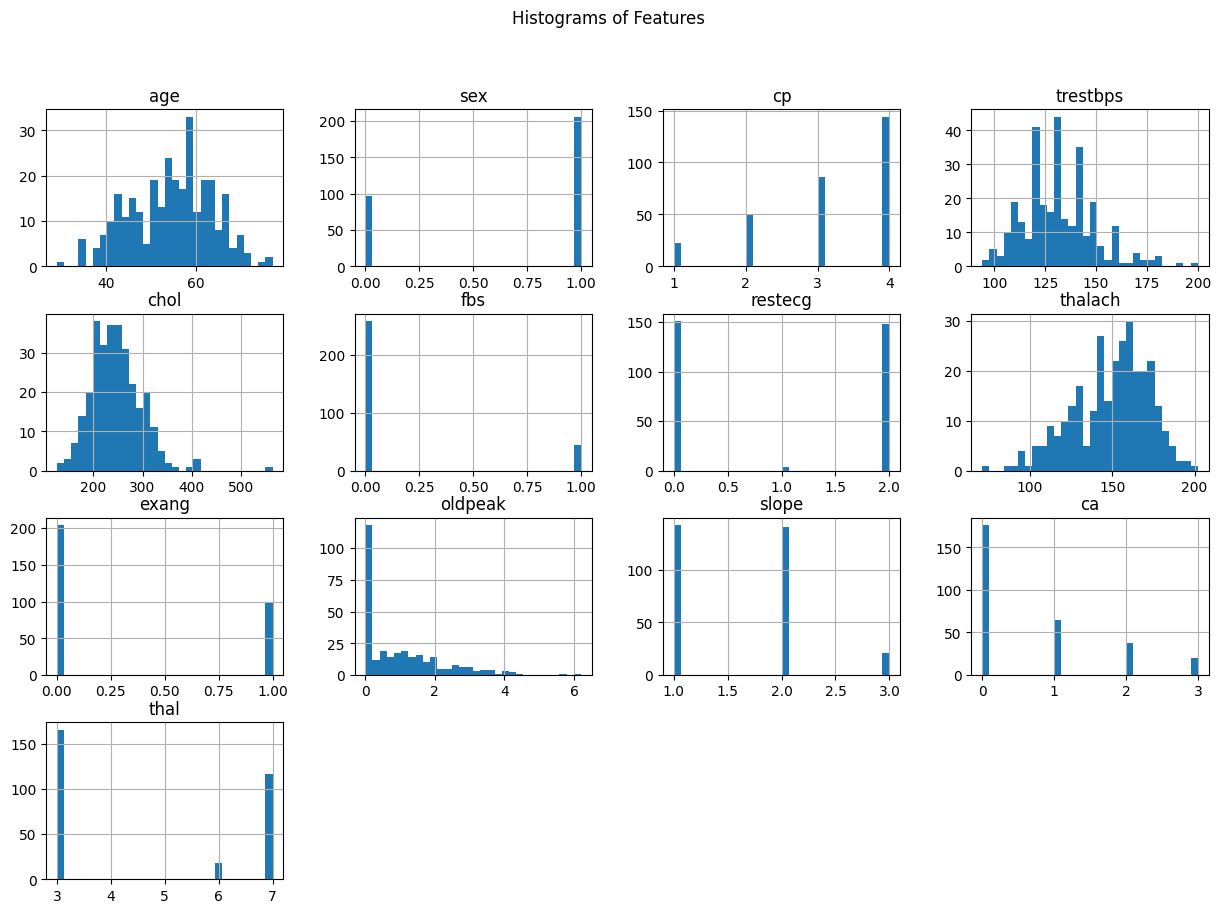

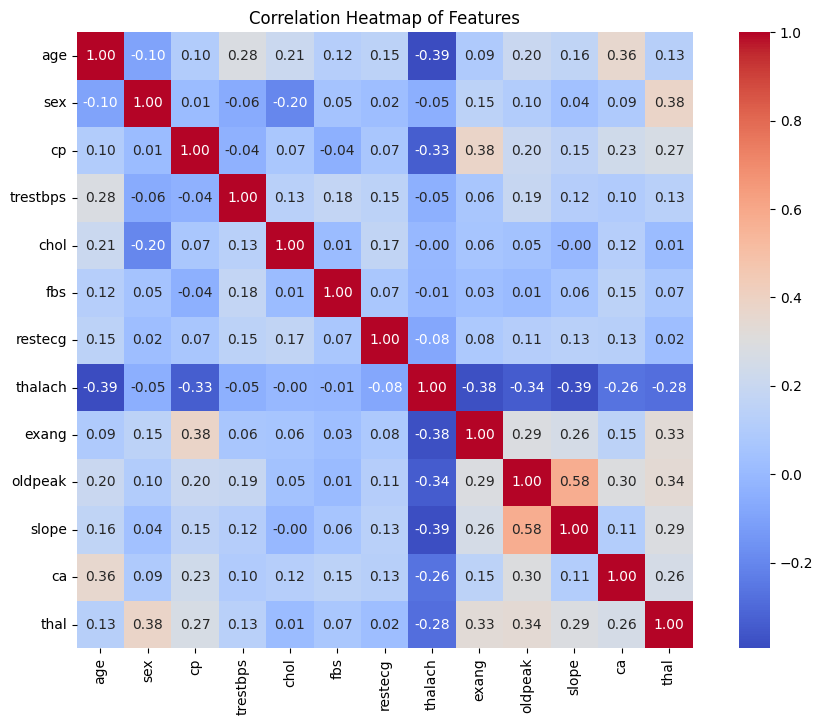

In [ ]:
import seaborn as sns
# Check the properties of the DataFrames
print("Number of rows:", X.shape[0])
print("Number of columns:", X.shape[1])
print("\nFirst few rows of the features DataFrame:")
print(X.head())

print("\nDescriptive statistics:")
print(X.describe())

print("\nInfo about the DataFrame:")
print(X.info())

# Visualize the distribution of features using histograms
X.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Features')
plt.show()

# Find the correlation among features using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

### Data Cleaning

In [ ]:
# Check for missing values
missing_values = X.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [ ]:
# Dropping rows with missing values
df = df.dropna()
X = df.iloc[:, :11]  # Features: first 11 columns
y = df.iloc[:,12]   # Target: 12th column
# you can fill the missing values if the missing data is very large:
# Filling missing values with the mean (for numerical columns)
# X_filled = X.fillna(X.mean())
# For categorical columns, use mode imputation
# X_filled['categorical_column'] = X_filled['categorical_column'].fillna(X_filled['categorical_column'].mode()[0])


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
# First few rows of our processed data
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583


##  Feature Extraction and Model Training

### Feature Selection/Extraction

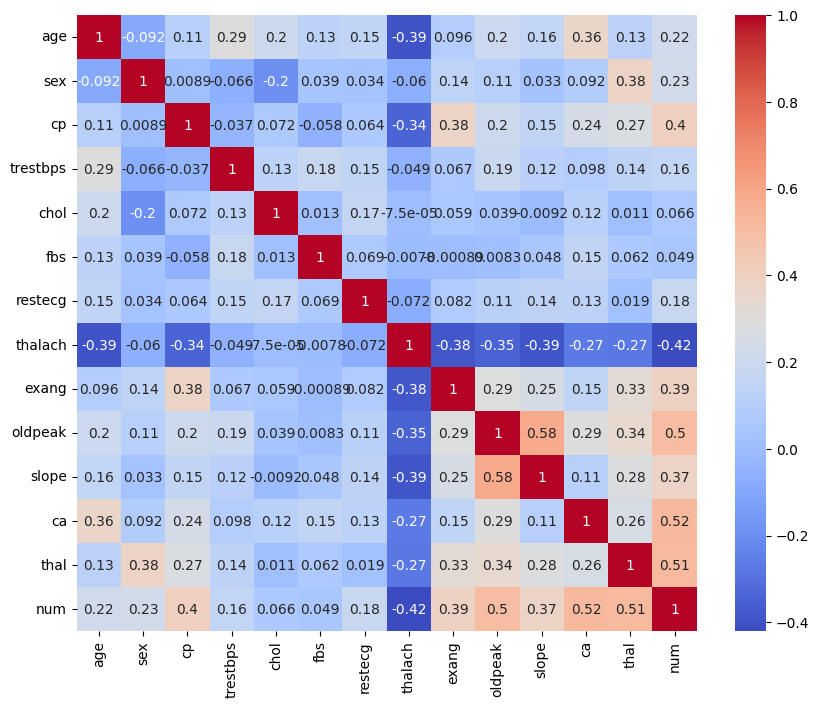

num         1.000000
ca          0.521178
thal        0.513377
oldpeak     0.501461
thalach     0.420639
cp          0.404248
exang       0.391613
slope       0.374689
sex         0.226797
age         0.222156
restecg     0.184136
trestbps    0.159620
chol        0.066448
fbs         0.049040
Name: num, dtype: float64


In [ ]:
# Corelataion analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Features with strong correlation
relevant_features = correlation_matrix['num'].abs().sort_values(ascending=False)
print(relevant_features)


Training features shape: (237, 11)
Testing features shape: (60, 11)
Training target shape: (237,)
Testing target shape: (60,)


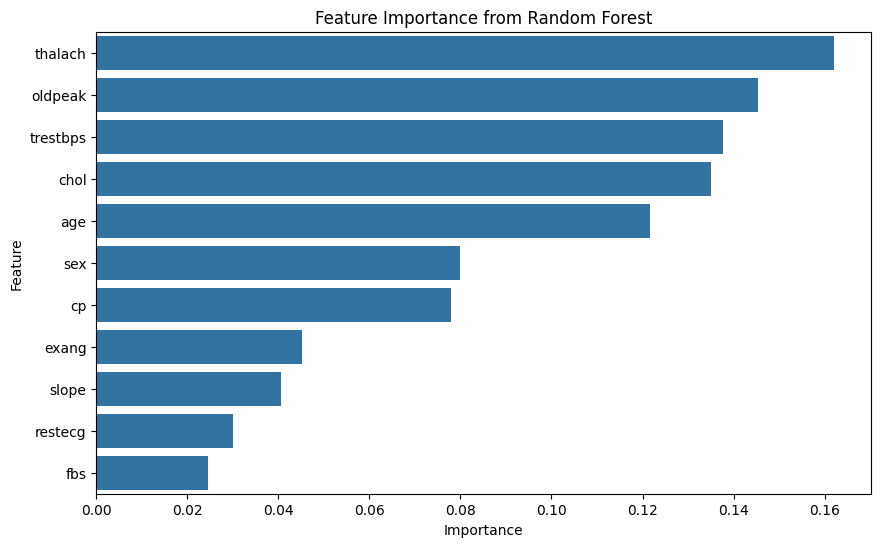

Top features: ['thalach' 'oldpeak' 'trestbps' 'chol' 'age']


In [ ]:
# Important Features
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()

# Select the top N important features (e.g., top 5)
top_features = feature_importance_df.head(5)['Feature'].values
print("Top features:", top_features)


**You can drop the features with less corelation and less importance but in this case we will be using all of the features. the feature and label class have been seperated in the above code and also split into test and train data.**

### Model Training

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Random Forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_random_forest = model.predict(X_test)

from sklearn.svm import SVC

# Initialize the Support Vector Machine model
model = SVC(kernel='linear', random_state=42)  # You can change the kernel if needed

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_SVM = model.predict(X_test)

## Evaluation, Visualization and Comparison

### Random_Forest Accuracy

In [ ]:
# Calculate accuracy
accuracy_RF = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy:", accuracy_RF)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_random_forest))

# Print confusion matrix
confusion_matrix_RF = confusion_matrix(y_test, y_pred_random_forest)
print("Confusion Matrix:\n", confusion_matrix_RF)

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

         3.0       0.71      0.69      0.70        32
         6.0       0.00      0.00      0.00         3
         7.0       0.62      0.72      0.67        25

    accuracy                           0.67        60
   macro avg       0.44      0.47      0.46        60
weighted avg       0.64      0.67      0.65        60

Confusion Matrix:
 [[22  0 10]
 [ 2  0  1]
 [ 7  0 18]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM Accuracy

In [ ]:
# Calculate accuracy
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print("Accuracy:", accuracy_SVM)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_SVM))

# Print confusion matrix
confusion_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print("Confusion Matrix:\n", confusion_matrix_SVM)

Accuracy: 0.6333333333333333

Classification Report:
               precision    recall  f1-score   support

         3.0       0.67      0.69      0.68        32
         6.0       0.00      0.00      0.00         3
         7.0       0.59      0.64      0.62        25

    accuracy                           0.63        60
   macro avg       0.42      0.44      0.43        60
weighted avg       0.60      0.63      0.62        60

Confusion Matrix:
 [[22  0 10]
 [ 2  0  1]
 [ 9  0 16]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualization of Results and Model Comparison

In [ ]:
# Random Forest
# Create a DataFrame for evaluation results
results_df = pd.DataFrame({
 'Model': ['Random Forest'],
 'Accuracy': [accuracy_RF],
})
# Save the results to a CSV file
results_df.to_csv('RandomForest_evaluation.csv', mode='a', header=True, index=False)


In [ ]:
# SVM
# Create a DataFrame for evaluation results
results_df = pd.DataFrame({
 'Model': ['SVM'],
 'Accuracy': [accuracy_SVM],
})
# Save the results to a CSV file
results_df.to_csv('SVM_evaluation.csv', mode='a', header=True, index=False)


### visual representation

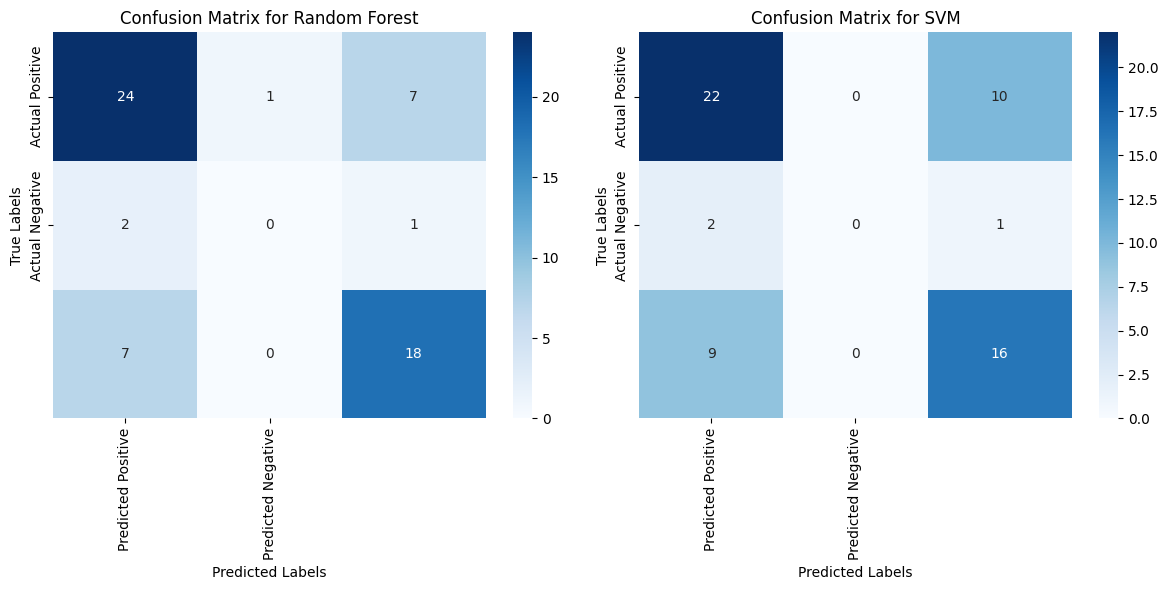

In [ ]:
# Plotting Confusion Matrices Side by Side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Decision Tree Classifier Confusion Matrix
sns.heatmap(confusion_matrix_RF, annot=True, fmt='d', cmap='Blues', ax=ax[0],
 xticklabels=['Predicted Positive', 'Predicted Negative'],
 yticklabels=['Actual Positive', 'Actual Negative'])
ax[0].set_title('Confusion Matrix for Random Forest')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Random Forest Classifier Confusion Matrix
sns.heatmap(confusion_matrix_SVM, annot=True, fmt='d', cmap='Blues', ax=ax[1],
 xticklabels=['Predicted Positive', 'Predicted Negative'],
 yticklabels=['Actual Positive', 'Actual Negative'])
ax[1].set_title('Confusion Matrix for SVM')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
plt.tight_layout()
plt.show()